In [1]:
import polaris as po

competition = po.load_competition("asap-discovery/antiviral-ligand-poses-2025")

[2025-02-04 16:11:30] INFO     The version of Polaris that was used to create the artifact (0.11.0) ]8;id=328034;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=477838;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.6).                                                                           

                      WARNING  You're loading data from a remote location. If the dataset is small     ]8;id=41093;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/dataset/_base.py\_base.py]8;;\:]8;id=57216;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/dataset/_base.py#182\182]8;;\
                               enough, consider caching the dataset first using                                    
                               CompetitionSpecification.cache() for more performant data access.                   

In [2]:
competition.cache()


Output()

[16:11:31] Copying to destination                                                                      ]8;id=539543;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/dataset/_base.py\_base.py]8;;\:]8;id=877100;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/dataset/_base.py#381\381]8;;\
           /home/hmacdope/.cache/polaris/datasets/befd0e69-5dd1-4830-9239-7e057e5c260e/data.zarr                   

           For large Zarr archives, this may take a while.                                             ]8;id=500788;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/dataset/_base.py\_base.py]8;;\:]8;id=267284;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/dataset/_base.py#382\382]8;;\

[16:12:01]  Success: Copying Zarr keys                                                                ]8;id=261048;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=42753;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

            Success: Copying Zarr archive                                                             ]8;id=751811;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=537146;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

'/home/hmacdope/.cache/polaris/datasets/befd0e69-5dd1-4830-9239-7e057e5c260e'

In [3]:
train, test = competition.get_train_test_split()


In [4]:
test[0]

{'Chain B Sequence': 'SGLVKMSHPSGDVEACMVQVTCGSMTLNGLWLDNTVWCPRHVMCPADQLSDPNYDALLISMTNHSFSVQKHIGAPANLRVVGHAMQGTLLKLTVDVANPSTPAYTFTTVKPGAAFSVLACYNGRPTGTFTVVMRPNYTIKGSFLCGSCGSVGYTKEGSVINFCYMHQMELANGTHTGSAFDGTMYGAFMDKQVHQVQLTDKYCSVNVVAWLYAAILNGCAWFVKPNRTSVVSFNEWALANQFTEFVGTQSVDMLAVKTGVAIEQLLYAIQQLYTGFQGKQILGSTMLEDEFTPEDVNMQIMGV',
 'CXSMILES': 'O=C1c2ccc(Cl)cc2[C@@]2(CN1Cc1nnco1)C(=O)N(c1cncc3ccccc13)C[C@@H]2CNc1ncncn1',
 'Chain A Sequence': 'SGLVKMSHPSGDVEACMVQVTCGSMTLNGLWLDNTVWCPRHVMCPADQLSDPNYDALLISMTNHSFSVQKHIGAPANLRVVGHAMQGTLLKLTVDVANPSTPAYTFTTVKPGAAFSVLACYNGRPTGTFTVVMRPNYTIKGSFLCGSCGSVGYTKEGSVINFCYMHQMELANGTHTGSAFDGTMYGAFMDKQVHQVQLTDKYCSVNVVAWLYAAILNGCAWFVKPNRTSVVSFNEWALANQFTEFVGTQSVDMLAVKTGVAIEQLLYAIQQLYTGFQGKQILGSTMLEDEFTPEDVNMQIMGV',
 'Protein Label': 'MERS-CoV Mpro'}

In [5]:
prot_labels = [t["Protein Label"] for t in test]

In [6]:
test_smiles = [t["CXSMILES"] for t in test]

In [7]:
# write to a file 

In [8]:
with open("test_smiles.txt", "w") as f:
    for s in test_smiles:
        f.write(f"{s}\n")

In [9]:
from asapdiscovery.data.readers.molfile import MolFileFactory


query_ligands = MolFileFactory(filename="test_smiles.txt").load()


In [10]:
query_ligands[0].smiles

'c1ccc2c(c1)cncc2N3C[C@@H]([C@@]4(C3=O)CN(C(=O)c5c4cc(cc5)Cl)Cc6nnco6)CNc7ncncn7'

In [11]:
len(test_smiles)

195

In [12]:
len(query_ligands)

195

In [13]:
for ql, ts in zip(query_ligands, test_smiles):
    ql.tags = {"polaris_smiles": ts}

In [14]:
query_ligands[0].tags

{'polaris_smiles': 'O=C1c2ccc(Cl)cc2[C@@]2(CN1Cc1nnco1)C(=O)N(c1cncc3ccccc13)C[C@@H]2CNc1ncncn1'}

In [15]:
from asapdiscovery.data.util.dask_utils import BackendType, make_dask_client_meta, DaskType
from asapdiscovery.docking.scorer import ChemGauss4Scorer


dask_client = make_dask_client_meta(DaskType.LOCAL)

2025-02-04 16:12:10,774 - distributed.http.proxy - INFO - To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
2025-02-04 16:12:10,799 - distributed.scheduler - INFO - State start
2025-02-04 16:12:10,831 - distributed.scheduler - INFO -   Scheduler at:     tcp://127.0.0.1:45949
2025-02-04 16:12:10,832 - distributed.scheduler - INFO -   dashboard at:  http://127.0.0.1:8787/status
2025-02-04 16:12:10,832 - distributed.scheduler - INFO - Registering Worker plugin shuffle
2025-02-04 16:12:10,874 - distributed.nanny - INFO -         Start Nanny at: 'tcp://127.0.0.1:46411'
2025-02-04 16:12:10,875 - distributed.nanny - INFO -         Start Nanny at: 'tcp://127.0.0.1:42107'
2025-02-04 16:12:10,876 - distributed.nanny - INFO -         Start Nanny at: 'tcp://127.0.0.1:46835'
2025-02-04 16:12:10,878 - distributed.nanny - INFO -         Start Nanny at: 'tcp://127.0.0.1:42677'
2025-02-04 16:12:10,879 - distributed.nanny - INFO - 

In [16]:
dask_client

<Client: 'tcp://127.0.0.1:45949' processes=16 threads=16, memory=124.95 GiB>

In [17]:
from asapdiscovery.modeling.protein_prep import ProteinPrepper
from asapdiscovery.data.schema.complex import Complex
from asapdiscovery.data.readers.structure_dir import StructureDirFactory 

In [18]:
factory = StructureDirFactory(parent_dir="./TRAIN_COMPLEX_PDBS_ONLY_A/")
complexes = factory.load(use_dask=True, dask_client=dask_client)

In [19]:
sars_align_path = "./ligand-posing/ALIGNMENT_REFERENCES/SARS-CoV-2-Mpro/reference_structure/complex.pdb"

In [20]:
mers_align_path = "./ligand-posing/ALIGNMENT_REFERENCES/MERS-CoV-Mpro/reference_structure/complex.pdb"

In [21]:
structure_cache_dir = "./structure_cache"

In [22]:
        ref_complex_SARS = Complex.from_pdb(
            sars_align_path,
            target_kwargs={"target_name": "ref_sars"},
            ligand_kwargs={"compound_name": "ref_ligand_sars"},
        )

In [23]:
ref_complex_MERS = Complex.from_pdb(
            mers_align_path,
            target_kwargs={"target_name": "ref_sars"},
            ligand_kwargs={"compound_name": "ref_ligand_sars"},
        )

In [24]:
    prepper = ProteinPrepper(
        cache_dir=structure_cache_dir,
        align=ref_complex_SARS,
        ref_chain="A",
        active_site_chain="A"
    )

    prepped_complexes = prepper.prep(
        complexes,
        use_dask=True,
        dask_client=dask_client,
        failure_mode="skip",
        cache_dir=structure_cache_dir,
    )
    del complexes



/home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/distributed/client.py:3149: UserWarning: Sending large graph of size 203.82 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
No BioAssembly transforms found, using input molecule as biounit: _chainA_UNK
Iridium - Structure: _chainA_UNK has no REMARK data
No BioAssembly transforms found, using input molecule as biounit: _chainA_UNK
Iridium - Structure: _chainA_UNK has no REMARK data
No BioAssembly transforms found, using input molecule as biounit: _chainA_UNK
Iridium - Structure: _chainA_UNK has no REMARK data
No BioAssembly transforms found, using input molecule as biounit: _chainA_UNK
No BioAssembly transforms found, using input molecule as biounit: _chainA_UNK
Iridium - Structure: _chainA_UNK has no REMARK data
No BioAssembly transforms found, using input molecule as biounit: _chainA_UNK
Iridium - Structure: _chainA_UNK has no REMARK data
Iridium - Structu

In [25]:
prepper.cache(prepped_complexes, structure_cache_dir)


In [26]:

import datamol as dm
import numpy as np

from tqdm import tqdm

# y_pred = []

# for x in tqdm(test): 

#     # Generate a random conformer
#     mol = dm.to_mol(x["CXSMILES"])
#     mol = dm.conformers.generate(mol, n_confs=1)

#     # That's our prediction
#     y_pred.append(mol)

In [27]:
from asapdiscovery.data.operators.selectors.mcs_selector import RascalMCESSelector

selector = RascalMCESSelector()
pairs = selector.select(
        query_ligands,
        prepped_complexes,
        n_select=5,
        use_dask=True,
        dask_client=dask_client,
        failure_mode="skip"
    )

[16:25:05] Explicit valence for atom # 19 C, 5, is greater than permitted
[16:25:05] Explicit valence for atom # 15 C, 5, is greater than permitted
[16:25:05] Explicit valence for atom # 15 C, 5, is greater than permitted
[16:25:06] Explicit valence for atom # 19 C, 5, is greater than permitted
[16:25:06] Explicit valence for atom # 15 C, 5, is greater than permitted
[16:25:06] Explicit valence for atom # 15 C, 5, is greater than permitted
[16:25:06] Explicit valence for atom # 15 C, 5, is greater than permitted
[16:25:06] Explicit valence for atom # 19 C, 5, is greater than permitted
[16:25:06] Explicit valence for atom # 15 C, 5, is greater than permitted
[16:25:07] Explicit valence for atom # 15 C, 5, is greater than permitted
[16:25:07] Explicit valence for atom # 15 C, 5, is greater than permitted
[16:25:07] Explicit valence for atom # 19 C, 5, is greater than permitted
[16:25:07] Explicit valence for atom # 19 C, 5, is greater than permitted
[16:25:07] Explicit valence for atom #

In [28]:
from asapdiscovery.docking.openeye import POSITDocker

docker = POSITDocker(
        use_omega=False,
        allow_retries=True,
        last_ditch_fred=True,
    )
results = docker.dock(
        pairs,
        output_dir="docking_results",
        use_dask=True,
        dask_client=dask_client,
        failure_mode="skip",
        return_for_disk_backend=False,
    )


2025-02-04 16:26:39,584 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
/home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/distributed/client.py:3149: UserWarning: Sending large graph of size 124.62 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
2025-02-04 16:26:47,636 - distributed.core - INFO - Event loop was unresponsive in Worker for 6.59s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
2025-02-04 16:26:47,863 - distributed.core - INFO - Event loop was unresponsive in Worker for 6.61s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
2025-02-04 16:26:48,100 - distributed.core - INFO - Event loop was unresponsive in Worker for 6.78s.  This is often caused by long-running GIL-hold

In [29]:
from asapdiscovery.docking.scorer import (
    ChemGauss4Scorer,
    MetaScorer,
)

scorers = [ChemGauss4Scorer()]
scorer = MetaScorer(scorers=scorers)



scores_df = scorer.score(
        results,
        use_dask=True,
        dask_client=dask_client,
        failure_mode="skip",
        return_df=True,
        backend="in-memory",
)



/home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/distributed/client.py:3149: UserWarning: Sending large graph of size 1.09 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
2025-02-04 16:33:37,769 - distributed.core - INFO - Event loop was unresponsive in Worker for 5.67s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
2025-02-04 16:33:38,016 - distributed.core - INFO - Event loop was unresponsive in Worker for 5.94s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
2025-02-04 16:33:38,166 - distributed.core - INFO - Event loop was unresponsive in Worker for 6.08s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
2025-02-04 16:33:38,243 - distributed.core - 

In [30]:
scores_df.to_csv("docking_scores_raw.csv", index=False)

In [31]:
scores_df

score_type                              complex_ligand_smiles  \
0                          C#Cc1cccc(c1)CC(=O)Nc2cncc3c2cccc3   
1                          C#Cc1cccc(c1)CC(=O)Nc2cncc3c2cccc3   
2                                           C1C=NC([NH2+]1)CN   
3                                 C=C(c1cccnc1)C(=O)Nc2ccccc2   
4           CC(=O)N1CC[C@H](c2c1ccc(c2)Cl)C(=O)Nc3cncc4c3c...   
..                                                        ...   
970         c1ccc2c(c1)cncc2NC(=O)[C@@H]3C[NH2+]Cc4c3cc(cc...   
971         c1ccc2c(c1)cncc2NC(=O)[C@@H]3C[NH2+]Cc4c3cc(cc...   
972         c1ccc2c(c1)cncc2NC(=O)[C@@H]3C[NH2+]Cc4c3cc(cc...   
973         c1ccc2c(c1)cncc2NC(=O)[C@@H]3C[NH2+]Cc4c3cc(cc...   
974         c1ccc2c(c1)cncc2NC(=O)[C@@H]3C[NH2+]Cc4c3cc(cc...   

score_type                                             SMILES  pose_id  \
0                       c1ccc2c(c1)cncc2CC(=O)N3CCC(CC3)C4CC4        0   
1                       c1ccc2c(c1)cncc2CC(=O)N3CCC4(CCC4)CC3        0   
2           CC(C)(C)[C@@H](C(=O)N1C[C@@H](C[C@H]1C(=O)N[C@...        0   
3                              c1ccc2c(c1)cncc2CC(=O)N3CCCCC3        0   
4           CCC(=O)N1CCCc2c1cc(cc2)N(C(=O)Cc3cncc4c3cccc4)...        0   
..                                                        ...      ...   
970           CN1C[C@H](c2cc(ccc2C1=O)Cl)C(=O)Nc3cncc4c3cccc4        0   
971           CN1C[C@H](c2cc(ccc2C1=O)Cl)C(=O)Nc3cncc4c3cccc4        0   
972           CN1C[C@H](c2cc(ccc2C1=O)Cl)C(=O)Nc3cncc4c3cccc4        0   
973           CN1C[C@H](c2cc(ccc2C1=O)Cl)C(=O)Nc3cncc4c3cccc4        0   
974           CN1C[C@H](c2cc(ccc2C1=O)Cl)C(=O)Nc3cncc4c3cccc4        0   

score_type  docking-confidence-POSIT target_identifiers  \
0                               0.18                NaN   
1                               0.50                NaN   
2                               0.02                NaN   
3                               0.33                NaN   
4                               0.51                NaN   
..                               ...                ...   
970                             0.90                NaN   
971                             0.90                NaN   
972                             0.90                NaN   
973                             0.90                NaN   
974                             0.90                NaN   

score_type                 docking-structure-POSIT  \
0           SARS-CoV-2_Mpro-x11458_0A_CONFIDENTIAL   
1           SARS-CoV-2_Mpro-x11458_0A_CONFIDENTIAL   
2            SARS-CoV-2_Mpro-x2119_0A_CONFIDENTIAL   
3           SARS-CoV-2_Mpro-x10022_0A_CONFIDENTIAL   
4            SARS-CoV-2_Mpro-P0148_0B_CONFIDENTIAL   
..                                             ...   
970          SARS-CoV-2_Mpro-P0240_0A_CONFIDENTIAL   
971          SARS-CoV-2_Mpro-P0240_0B_CONFIDENTIAL   
972          SARS-CoV-2_Mpro-P0240_0B_CONFIDENTIAL   
973          SARS-CoV-2_Mpro-P0744_0A_CONFIDENTIAL   
974          SARS-CoV-2_Mpro-P0744_0A_CONFIDENTIAL   

score_type                     INCHIKEY ligand_identifiers  \
0           XGAXVWRMZLCNLB-UHFFFAOYSA-N                NaN   
1           ZEPNBRUOHBYYPR-UHFFFAOYSA-N                NaN   
2           UJGYRQGIZAPYNF-AIEDFZFUSA-O                NaN   
3           DFZCOIXITRAKCU-UHFFFAOYSA-N                NaN   
4           DIISHUJWFOBGML-UHFFFAOYSA-N                NaN   
..                                  ...                ...   
970         DJPAUPULWFYJNN-QGZVFWFLSA-N                NaN   
971         DJPAUPULWFYJNN-QGZVFWFLSA-N                NaN   
972         DJPAUPULWFYJNN-QGZVFWFLSA-N                NaN   
973         DJPAUPULWFYJNN-QGZVFWFLSA-N                NaN   
974         DJPAUPULWFYJNN-QGZVFWFLSA-N                NaN   

score_type           ligand_id  \
0           unknown_ligand_121   
1           unknown_ligand_120   
2           unknown_ligand_154   
3            unknown_ligand_13   
4            unknown_ligand_41   
..                     

In [32]:
scores_df["ligand_id"].nunique()

195

In [33]:
    scores_df = scores_df.sort_values(
        "docking-score-POSIT", ascending=True
    )

In [34]:
scores_df

score_type                              complex_ligand_smiles  \
696           COc1ccc(cc1)N(Cc2cccc(c2)Cl)C(=O)CN3c4ccccc4NN3   
705         C[NH+](C)C1C=CC(N=C1)N(Cc2cccc(c2)Cl)C(=O)Cc3c...   
706         C[NH+](C)C1C=CC(N=C1)N(Cc2cccc(c2)Cl)C(=O)Cc3c...   
768                       Cc1ccncc1CC(=O)Nc2cccc3c2C[NH2+]CC3   
712         C[NH+](C)C1C=CC(N=C1)N(Cc2cccc(c2)Cl)C(=O)Cc3c...   
..                                                        ...   
54            CC(C)OCCCN(Cc1ccco1)C(=O)Nc2cn(c(=O)c3c2cccc3)C   
795                             c1ccc(c(c1)C(=O)NCCc2ccncc2)F   
58          CCCNC(=O)CN1C[C@H](c2cc(ccc2C1=O)Cl)C(=O)Nc3cn...   
710         C[NH+](C)C1C=CC(N=C1)N(Cc2cccc(c2)Cl)C(=O)Cc3c...   
751         Cc1cccc2c1c(cnc2)NC(=O)[C@@H]3C[N@H+](Cc4c3cc(...   

score_type                                             SMILES  pose_id  \
696          COc1ccc(cc1)N(Cc2cccc(c2)Cl)C(=O)Cc3cncc4c3cccc4        0   
705         CC(C)(C#N)c1ccc(cc1)N(Cc2cccc(c2)Cl)C(=O)Cc3cn...        0   
706         CC(C)(C#N)c1ccc(cc1)N(Cc2cccc(c2)Cl)C(=O)Cc3cn...        0   
768                     c1ccc2c(c1)cncc2CC(=O)N3CCC4(CCC4)CC3        0   
712         CCC(=O)Nc1cccc(c1)N(Cc2ccccc2)C(=O)Cc3cncc4c3c...        0   
..                                                        ...      ...   
54          CCNC(=O)C(=C)CN(c1cccc(c1)Cl)C(=O)Nc2cncc3c2cccc3        0   
795                      c1ccc2c(c1)cncc2CC(=O)NCc3cccc(c3)Cl        0   
58          c1ccc2c(c1)cncc2NC(=O)[C@@H]3C[N@H+](Cc4c3cc(c...        0   
710         CCC(=O)N1CCCc2c1cc(cc2)N(Cc3cccc(c3)Cl)C(=O)Cc...        0   
751         c1ccc2c(c1)cncc2NC(=O)[C@@H]3C[N@H+](Cc4c3cc(c...        0   

score_type  docking-confidence-POSIT target_identifiers  \
696                             0.83                NaN   
705                             0.79                NaN   
706                             0.79                NaN   
768                             0.33                NaN   
712                             0.42                NaN   
..                               ...                ...   
54                              0.14                NaN   
795                             0.78                NaN   
58                              0.87                NaN   
710                             0.72                NaN   
751                             0.69                NaN   

score_type                 docking-structure-POSIT  \
696         SARS-CoV-2_Mpro-x12177_0A_CONFIDENTIAL   
705          SARS-CoV-2_Mpro-P0057_0A_CONFIDENTIAL   
706          SARS-CoV-2_Mpro-P0057_0B_CONFIDENTIAL   
768         SARS-CoV-2_Mpro-x11354_0A_CONFIDENTIAL   
712          SARS-CoV-2_Mpro-P0057_0B_CONFIDENTIAL   
..                                             ...   
54          SARS-CoV-2_Mpro-x12350_0A_CONFIDENTIAL   
795          SARS-CoV-2_Mpro-x0426_0A_CONFIDENTIAL   
58           SARS-CoV-2_Mpro-P2242_0A_CONFIDENTIAL   
710          SARS-CoV-2_Mpro-P0057_0B_CONFIDENTIAL   
751          SARS-CoV-2_Mpro-P2178_0B_CONFIDENTIAL   

score_type                     INCHIKEY ligand_identifiers  \
696         LRGKWKMIZJJVJM-UHFFFAOYSA-N                NaN   
705         HOSYWXDLYYCTEQ-UHFFFAOYSA-N                NaN   
706         HOSYWXDLYYCTEQ-UHFFFAOYSA-N                NaN   
768         ZEPNBRUOHBYYPR-UHFFFAOYSA-N                NaN   
712         GULWMYIDTZEZPJ-UHFFFAOYSA-N                NaN   
..                                  ...                ...   
54          KSVPMMUUJFSGJU-UHFFFAOYSA-N                NaN   
795         PHUYFUIXFJFGGJ-UHFFFAOYSA-N                NaN   
58          OFURFNPRYDIXAI-AREMUKBSSA-O                NaN   
710         JVQONISACHJVKP-UHFFFAOYSA-N                NaN   
751         IGFMQVXQADZXOR-HHHXNRCGSA-O                NaN   

score_type           ligand_id  \
696           unknown_ligand_1   
705         unknown_ligand_152   
706         unknown_ligand_152   
768         unknown_ligand_120   
712          unknown_ligand_97   
..                     

In [35]:
    # remove duplicates that are the same compound docked to different structures
    unique = scores_df.drop_duplicates(
        subset=["ligand_id"], keep="first"
    )

In [36]:
unique

score_type                              complex_ligand_smiles  \
696           COc1ccc(cc1)N(Cc2cccc(c2)Cl)C(=O)CN3c4ccccc4NN3   
705         C[NH+](C)C1C=CC(N=C1)N(Cc2cccc(c2)Cl)C(=O)Cc3c...   
768                       Cc1ccncc1CC(=O)Nc2cccc3c2C[NH2+]CC3   
712         C[NH+](C)C1C=CC(N=C1)N(Cc2cccc(c2)Cl)C(=O)Cc3c...   
767                       Cc1ccncc1CC(=O)Nc2cccc3c2C[NH2+]CC3   
..                                                        ...   
448         CNC(=O)CN1C[C@]2(CCN(C2=O)c3cncc4c3cccc4)c5cc(...   
783                  c1c(cncc1F)n2c(c([nH]c2=O)CC3CCCCC3)[O-]   
573         CNC(=O)C[N@H+]1Cc2ccc(cc2[C@@H](C1)C(=O)Nc3cnc...   
106         CNC(=O)CN1C[C@H](c2cc(ccc2C1=O)Cl)C(=O)Nc3cncc...   
901         c1ccc2c(c1)cncc2N3C(=O)[C@@]4(CCOc5c4cc(cc5)Cl...   

score_type                                             SMILES  pose_id  \
696          COc1ccc(cc1)N(Cc2cccc(c2)Cl)C(=O)Cc3cncc4c3cccc4        0   
705         CC(C)(C#N)c1ccc(cc1)N(Cc2cccc(c2)Cl)C(=O)Cc3cn...        0   
768                     c1ccc2c(c1)cncc2CC(=O)N3CCC4(CCC4)CC3        0   
712         CCC(=O)Nc1cccc(c1)N(Cc2ccccc2)C(=O)Cc3cncc4c3c...        0   
767                     c1ccc2c(c1)cncc2CC(=O)N3CCC(CC3)C4CC4        0   
..                                                        ...      ...   
448         C[C@H]1CN(C(=O)[C@@]12CN(C(=O)c3c2cc(cc3)Cl)CC...        0   
783             C[C@@H]1CCc2c(n(c(=O)n2C1)c3cncc4c3cccc4)[O-]        0   
573         c1ccc2c(c1)cncc2NC(=O)[C@@H]3C[N@H+](Cc4c3cc(c...        0   
106         c1ccc2c(c1)cncc2NC(=O)[C@@H]3C[N@H+](Cc4c3cc(c...        0   
901         c1ccc2c(c1)cncc2N3C(=O)[C@]4(CCOc5c4cc(cc5)S(=...        0   

score_type  docking-confidence-POSIT target_identifiers  \
696                             0.83                NaN   
705                             0.79                NaN   
768                             0.33                NaN   
712                             0.42                NaN   
767                             0.33                NaN   
..                               ...                ...   
448                             0.79                NaN   
783                             0.78                NaN   
573                             0.89                NaN   
106                             0.69                NaN   
901                             0.72                NaN   

score_type                 docking-structure-POSIT  \
696         SARS-CoV-2_Mpro-x12177_0A_CONFIDENTIAL   
705          SARS-CoV-2_Mpro-P0057_0A_CONFIDENTIAL   
768         SARS-CoV-2_Mpro-x11354_0A_CONFIDENTIAL   
712          SARS-CoV-2_Mpro-P0057_0B_CONFIDENTIAL   
767         SARS-CoV-2_Mpro-x11354_0A_CONFIDENTIAL   
..                                             ...   
448          SARS-CoV-2_Mpro-P2487_0B_CONFIDENTIAL   
783          SARS-CoV-2_Mpro-z7b2u_0B_CONFIDENTIAL   
573          SARS-CoV-2_Mpro-P1090_0A_CONFIDENTIAL   
106          SARS-CoV-2_Mpro-P1835_0A_CONFIDENTIAL   
901          SARS-CoV-2_Mpro-P0022_0B_CONFIDENTIAL   

score_type                     INCHIKEY ligand_identifiers  \
696         LRGKWKMIZJJVJM-UHFFFAOYSA-N                NaN   
705         HOSYWXDLYYCTEQ-UHFFFAOYSA-N                NaN   
768         ZEPNBRUOHBYYPR-UHFFFAOYSA-N                NaN   
712         GULWMYIDTZEZPJ-UHFFFAOYSA-N                NaN   
767         XGAXVWRMZLCNLB-UHFFFAOYSA-N                NaN   
..                                  ...                ...   
448         KUJCQAOOEDVVJI-WRONEBCDSA-O                NaN   
783         FXNXRHJJLOXDEH-LLVKDONJSA-M                NaN   
573         OFURFNPRYDIXAI-AREMUKBSSA-O                NaN   
106         IGFMQVXQADZXOR-HHHXNRCGSA-O                NaN   
901         JGUHJQWOUHEHHJ-HXUWFJFHSA-N                NaN   

score_type           ligand_id  \
696           unknown_ligand_1   
705         unknown_ligand_152   
768         unknown_ligand_120   
712          unknown_ligand_97   
767         unknown_ligand_121   
..                     

In [37]:
test_inchis = [dm.to_inchikey(t) for t in test_smiles]

In [38]:
protein_labels = [t["Protein Label"] for t in test ] # need to jam into df

In [39]:
unique["lig_id_no"] = unique["ligand_id"].apply(lambda x: int(x.split("_")[-1]))

/tmp/ipykernel_133758/1748029362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique["lig_id_no"] = unique["ligand_id"].apply(lambda x: int(x.split("_")[-1]))


In [40]:
unique.sort_values("lig_id_no")

score_type                              complex_ligand_smiles  \
572         CNC(=O)CN1C[C@]2(CCN(C2=O)c3cncc4c3cccc4)c5cc(...   
696           COc1ccc(cc1)N(Cc2cccc(c2)Cl)C(=O)CN3c4ccccc4NN3   
364         CNC(=O)CN1C[C@]2(CCN(C2=O)c3cncc4c3cccc4)c5cc(...   
410         CNC(=O)CN1C[C@]2(CCN(C2=O)c3cncc4c3cccc4)c5cc(...   
566         CNC(=O)CN1C[C@]2(CCN(C2=O)c3cncc4c3cccc4)c5cc(...   
..                                                        ...   
963         c1ccc2c(c1)cncc2NC(=O)[C@@H]3CNS(=O)(=O)c4c3cc...   
363         CNC(=O)CN1C[C@]2(CCN(C2=O)c3cncc4c3cccc4)c5cc(...   
742         C[NH+](C)C1C=CC(N=C1)N(Cc2cccc(c2)Cl)C(=O)Cc3c...   
334         CNC(=O)CN1C[C@]2(CCN(C2=O)c3cncc4c3cccc4)c5cc(...   
889         c1ccc2c(c1)cncc2N3C(=O)[C@@]4(CCOc5c4cc(cc5)Cl...   

score_type                                             SMILES  pose_id  \
572         c1ccc2c(c1)cncc2N3C[C@@H]([C@@]4(C3=O)CN(C(=O)...        0   
696          COc1ccc(cc1)N(Cc2cccc(c2)Cl)C(=O)Cc3cncc4c3cccc4        0   
364         CNC(=O)CN1C[C@@]2(c3cc(ccc3C1=O)Cl)[C@H](CN(C2...        0   
410         CNC(=O)CN1C[C@@]2(c3cc(ccc3C1=O)Cl)[C@H](CN(C2...        0   
566         c1ccc2c(c1)cncc2N3C[C@@H]([C@@]4(C3=O)CN(C(=O)...        0   
..                                                        ...      ...   
963         C[C@@H](c1cc(cc(c1)Cl)c2ccc(cc2)S(=O)(=O)N)NC(...        0   
363         CNC(=O)CN1C[C@@]2(c3cc(ccc3C1=O)Cl)[C@H](CN(C2...        0   
742                      c1ccc2c(c1)cncc2CC(=O)NCc3cccc(c3)Cl        0   
334         CC(C)OC[C@H]1CN(C(=O)[C@@]12CN(C(=O)c3c2cc(cc3...        0   
889         C[C@H]1C[C@@]2(COC1)C(=O)N(C(=O)N2)c3cncc4c3cccc4        0   

score_type  docking-confidence-POSIT target_identifiers  \
572                             0.78                NaN   
696                             0.83                NaN   
364                             0.82                NaN   
410                             0.91                NaN   
566                             0.69                NaN   
..                               ...                ...   
963                             0.24                NaN   
363                             0.82                NaN   
742                             0.18                NaN   
334                             0.85                NaN   
889                             0.91                NaN   

score_type                 docking-structure-POSIT  \
572          SARS-CoV-2_Mpro-P2487_0B_CONFIDENTIAL   
696         SARS-CoV-2_Mpro-x12177_0A_CONFIDENTIAL   
364          SARS-CoV-2_Mpro-P2487_0A_CONFIDENTIAL   
410          SARS-CoV-2_Mpro-P2487_0A_CONFIDENTIAL   
566          SARS-CoV-2_Mpro-P2487_0B_CONFIDENTIAL   
..                                             ...   
963          SARS-CoV-2_Mpro-P2099_0B_CONFIDENTIAL   
363          SARS-CoV-2_Mpro-P2487_0A_CONFIDENTIAL   
742          SARS-CoV-2_Mpro-P0057_0A_CONFIDENTIAL   
334          SARS-CoV-2_Mpro-P2487_0A_CONFIDENTIAL   
889         SARS-CoV-2_Mpro-x12686_0A_CONFIDENTIAL   

score_type                     INCHIKEY ligand_identifiers  \
572         INRDDGOELGFOMA-JMQGSBJISA-N                NaN   
696         LRGKWKMIZJJVJM-UHFFFAOYSA-N                NaN   
364         KZXBBCDPQDLZRG-SLQAJWMNSA-N                NaN   
410         KQNOKAYCKGIXFU-GBXCKJPGSA-O                NaN   
566         NRGQSDUOQHOVFB-UGDMGKLASA-N                NaN   
..                                  ...                ...   
963         CDIRCRIIKZGBTI-NSHDSACASA-N                NaN   
363         KZXBBCDPQDLZRG-SLQAJWMNSA-N                NaN   
742         PHUYFUIXFJFGGJ-UHFFFAOYSA-N                NaN   
334         OEHDDAARDCUYDF-GDJIYFAZSA-N                NaN   
889         XDTMINXNKFSUDN-APPDUMDISA-N                NaN   

score_type           ligand_id  \
572           unknown_ligand_0   
696           unknown_ligand_1   
364           unknown_ligand_2   
410           unknown_ligand_3   
566           unknown_ligand_4   
..                     

In [41]:
unique.set_index("lig_id_no").loc[154]

score_type
complex_ligand_smiles       CC1([C@@H]2[C@H]1[C@H](N(C2)C(=O)[C@H](C(C)(C)...
SMILES                      CC(C)(C)[C@@H](C(=O)N1C[C@@H](C[C@H]1C(=O)N[C@...
pose_id                                                                     0
docking-confidence-POSIT                                                 0.91
target_identifiers                                                        NaN
docking-structure-POSIT                 SARS-CoV-2_Mpro-z7tll_0A_CONFIDENTIAL
INCHIKEY                                          UJGYRQGIZAPYNF-AIEDFZFUSA-O
ligand_identifiers                                                        NaN
ligand_id                                                  unknown_ligand_154
input                       type='POSITDockingResults' input_pair=DockingI...
docking-score-POSIT                                                 -8.621801
Name: 154, dtype: object

In [42]:
!mkdir -p best_poses

In [43]:
def make_pose(id_no, inp):
    path = f"./best_poses/{id_no}.pdb"
    inp.to_posed_complex().to_pdb(path)
    return path

In [44]:
unique['protein_path'] = unique.apply(lambda x: make_pose(x.lig_id_no, x.input), axis=1)

2025-02-04 16:34:44,355 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2025-02-04 16:34:47,782 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2025-02-04 16:34:51,291 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2025-02-04 16:34:54,859 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
/tmp/ipykernel_133758/3119141169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique['protein_path'] = unique.apply(lambda x: make_pose(x.lig_id_no, x.input), axis=1)


In [45]:
# # Load the reference and mobile structure
# def align(ref_path):
# ref_path = path / "SARS-CoV-2-Mpro" / "complex.pdb"
# pymol.cmd.load(, "mobile")
# pymol.cmd.load(ref_path, "reference")
# pymol.cmd.align(
#     "polymer and name CA and mobile",
#     "polymer and name CA and reference",
#     quiet=0,
# );

In [46]:
# def serialize_rdkit_mol(mol: Chem.Mol): 
#     props = Chem.PropertyPickleOptions.AllProps
#     mol_bytes = mol.ToBinary(props)
#     return base64.b64encode(mol_bytes).decode('ascii')  

# y_pred_serialized = [serialize_rdkit_mol(mol) for mol in y_pred]

In [47]:

# deserialized = Chem.Mol(base64.b64decode(y_pred_serialized[0].encode("ascii")))
# deserialized

In [48]:
unique

score_type                              complex_ligand_smiles  \
696           COc1ccc(cc1)N(Cc2cccc(c2)Cl)C(=O)CN3c4ccccc4NN3   
705         C[NH+](C)C1C=CC(N=C1)N(Cc2cccc(c2)Cl)C(=O)Cc3c...   
768                       Cc1ccncc1CC(=O)Nc2cccc3c2C[NH2+]CC3   
712         C[NH+](C)C1C=CC(N=C1)N(Cc2cccc(c2)Cl)C(=O)Cc3c...   
767                       Cc1ccncc1CC(=O)Nc2cccc3c2C[NH2+]CC3   
..                                                        ...   
448         CNC(=O)CN1C[C@]2(CCN(C2=O)c3cncc4c3cccc4)c5cc(...   
783                  c1c(cncc1F)n2c(c([nH]c2=O)CC3CCCCC3)[O-]   
573         CNC(=O)C[N@H+]1Cc2ccc(cc2[C@@H](C1)C(=O)Nc3cnc...   
106         CNC(=O)CN1C[C@H](c2cc(ccc2C1=O)Cl)C(=O)Nc3cncc...   
901         c1ccc2c(c1)cncc2N3C(=O)[C@@]4(CCOc5c4cc(cc5)Cl...   

score_type                                             SMILES  pose_id  \
696          COc1ccc(cc1)N(Cc2cccc(c2)Cl)C(=O)Cc3cncc4c3cccc4        0   
705         CC(C)(C#N)c1ccc(cc1)N(Cc2cccc(c2)Cl)C(=O)Cc3cn...        0   
768                     c1ccc2c(c1)cncc2CC(=O)N3CCC4(CCC4)CC3        0   
712         CCC(=O)Nc1cccc(c1)N(Cc2ccccc2)C(=O)Cc3cncc4c3c...        0   
767                     c1ccc2c(c1)cncc2CC(=O)N3CCC(CC3)C4CC4        0   
..                                                        ...      ...   
448         C[C@H]1CN(C(=O)[C@@]12CN(C(=O)c3c2cc(cc3)Cl)CC...        0   
783             C[C@@H]1CCc2c(n(c(=O)n2C1)c3cncc4c3cccc4)[O-]        0   
573         c1ccc2c(c1)cncc2NC(=O)[C@@H]3C[N@H+](Cc4c3cc(c...        0   
106         c1ccc2c(c1)cncc2NC(=O)[C@@H]3C[N@H+](Cc4c3cc(c...        0   
901         c1ccc2c(c1)cncc2N3C(=O)[C@]4(CCOc5c4cc(cc5)S(=...        0   

score_type  docking-confidence-POSIT target_identifiers  \
696                             0.83                NaN   
705                             0.79                NaN   
768                             0.33                NaN   
712                             0.42                NaN   
767                             0.33                NaN   
..                               ...                ...   
448                             0.79                NaN   
783                             0.78                NaN   
573                             0.89                NaN   
106                             0.69                NaN   
901                             0.72                NaN   

score_type                 docking-structure-POSIT  \
696         SARS-CoV-2_Mpro-x12177_0A_CONFIDENTIAL   
705          SARS-CoV-2_Mpro-P0057_0A_CONFIDENTIAL   
768         SARS-CoV-2_Mpro-x11354_0A_CONFIDENTIAL   
712          SARS-CoV-2_Mpro-P0057_0B_CONFIDENTIAL   
767         SARS-CoV-2_Mpro-x11354_0A_CONFIDENTIAL   
..                                             ...   
448          SARS-CoV-2_Mpro-P2487_0B_CONFIDENTIAL   
783          SARS-CoV-2_Mpro-z7b2u_0B_CONFIDENTIAL   
573          SARS-CoV-2_Mpro-P1090_0A_CONFIDENTIAL   
106          SARS-CoV-2_Mpro-P1835_0A_CONFIDENTIAL   
901          SARS-CoV-2_Mpro-P0022_0B_CONFIDENTIAL   

score_type                     INCHIKEY ligand_identifiers  \
696         LRGKWKMIZJJVJM-UHFFFAOYSA-N                NaN   
705         HOSYWXDLYYCTEQ-UHFFFAOYSA-N                NaN   
768         ZEPNBRUOHBYYPR-UHFFFAOYSA-N                NaN   
712         GULWMYIDTZEZPJ-UHFFFAOYSA-N                NaN   
767         XGAXVWRMZLCNLB-UHFFFAOYSA-N                NaN   
..                                  ...                ...   
448         KUJCQAOOEDVVJI-WRONEBCDSA-O                NaN   
783         FXNXRHJJLOXDEH-LLVKDONJSA-M                NaN   
573         OFURFNPRYDIXAI-AREMUKBSSA-O                NaN   
106         IGFMQVXQADZXOR-HHHXNRCGSA-O                NaN   
901         JGUHJQWOUHEHHJ-HXUWFJFHSA-N                NaN   

score_type           ligand_id  \
696           unknown_ligand_1   
705         unknown_ligand_152   
768         unknown_ligand_120   
712          unknown_ligand_97   
767         unknown_ligand_121   
..                     

In [49]:
unique.sort_values("lig_id_no", inplace=True)

/tmp/ipykernel_133758/1639678927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique.sort_values("lig_id_no", inplace=True)


In [50]:
unique["protein_label"] = prot_labels

/tmp/ipykernel_133758/3371284925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique["protein_label"] = prot_labels


In [51]:
unique

score_type                              complex_ligand_smiles  \
572         CNC(=O)CN1C[C@]2(CCN(C2=O)c3cncc4c3cccc4)c5cc(...   
696           COc1ccc(cc1)N(Cc2cccc(c2)Cl)C(=O)CN3c4ccccc4NN3   
364         CNC(=O)CN1C[C@]2(CCN(C2=O)c3cncc4c3cccc4)c5cc(...   
410         CNC(=O)CN1C[C@]2(CCN(C2=O)c3cncc4c3cccc4)c5cc(...   
566         CNC(=O)CN1C[C@]2(CCN(C2=O)c3cncc4c3cccc4)c5cc(...   
..                                                        ...   
963         c1ccc2c(c1)cncc2NC(=O)[C@@H]3CNS(=O)(=O)c4c3cc...   
363         CNC(=O)CN1C[C@]2(CCN(C2=O)c3cncc4c3cccc4)c5cc(...   
742         C[NH+](C)C1C=CC(N=C1)N(Cc2cccc(c2)Cl)C(=O)Cc3c...   
334         CNC(=O)CN1C[C@]2(CCN(C2=O)c3cncc4c3cccc4)c5cc(...   
889         c1ccc2c(c1)cncc2N3C(=O)[C@@]4(CCOc5c4cc(cc5)Cl...   

score_type                                             SMILES  pose_id  \
572         c1ccc2c(c1)cncc2N3C[C@@H]([C@@]4(C3=O)CN(C(=O)...        0   
696          COc1ccc(cc1)N(Cc2cccc(c2)Cl)C(=O)Cc3cncc4c3cccc4        0   
364         CNC(=O)CN1C[C@@]2(c3cc(ccc3C1=O)Cl)[C@H](CN(C2...        0   
410         CNC(=O)CN1C[C@@]2(c3cc(ccc3C1=O)Cl)[C@H](CN(C2...        0   
566         c1ccc2c(c1)cncc2N3C[C@@H]([C@@]4(C3=O)CN(C(=O)...        0   
..                                                        ...      ...   
963         C[C@@H](c1cc(cc(c1)Cl)c2ccc(cc2)S(=O)(=O)N)NC(...        0   
363         CNC(=O)CN1C[C@@]2(c3cc(ccc3C1=O)Cl)[C@H](CN(C2...        0   
742                      c1ccc2c(c1)cncc2CC(=O)NCc3cccc(c3)Cl        0   
334         CC(C)OC[C@H]1CN(C(=O)[C@@]12CN(C(=O)c3c2cc(cc3...        0   
889         C[C@H]1C[C@@]2(COC1)C(=O)N(C(=O)N2)c3cncc4c3cccc4        0   

score_type  docking-confidence-POSIT target_identifiers  \
572                             0.78                NaN   
696                             0.83                NaN   
364                             0.82                NaN   
410                             0.91                NaN   
566                             0.69                NaN   
..                               ...                ...   
963                             0.24                NaN   
363                             0.82                NaN   
742                             0.18                NaN   
334                             0.85                NaN   
889                             0.91                NaN   

score_type                 docking-structure-POSIT  \
572          SARS-CoV-2_Mpro-P2487_0B_CONFIDENTIAL   
696         SARS-CoV-2_Mpro-x12177_0A_CONFIDENTIAL   
364          SARS-CoV-2_Mpro-P2487_0A_CONFIDENTIAL   
410          SARS-CoV-2_Mpro-P2487_0A_CONFIDENTIAL   
566          SARS-CoV-2_Mpro-P2487_0B_CONFIDENTIAL   
..                                             ...   
963          SARS-CoV-2_Mpro-P2099_0B_CONFIDENTIAL   
363          SARS-CoV-2_Mpro-P2487_0A_CONFIDENTIAL   
742          SARS-CoV-2_Mpro-P0057_0A_CONFIDENTIAL   
334          SARS-CoV-2_Mpro-P2487_0A_CONFIDENTIAL   
889         SARS-CoV-2_Mpro-x12686_0A_CONFIDENTIAL   

score_type                     INCHIKEY ligand_identifiers  \
572         INRDDGOELGFOMA-JMQGSBJISA-N                NaN   
696         LRGKWKMIZJJVJM-UHFFFAOYSA-N                NaN   
364         KZXBBCDPQDLZRG-SLQAJWMNSA-N                NaN   
410         KQNOKAYCKGIXFU-GBXCKJPGSA-O                NaN   
566         NRGQSDUOQHOVFB-UGDMGKLASA-N                NaN   
..                                  ...                ...   
963         CDIRCRIIKZGBTI-NSHDSACASA-N                NaN   
363         KZXBBCDPQDLZRG-SLQAJWMNSA-N                NaN   
742         PHUYFUIXFJFGGJ-UHFFFAOYSA-N                NaN   
334         OEHDDAARDCUYDF-GDJIYFAZSA-N                NaN   
889         XDTMINXNKFSUDN-APPDUMDISA-N                NaN   

score_type           ligand_id  \
572           unknown_ligand_0   
696           unknown_ligand_1   
364           unknown_ligand_2   
410           unknown_ligand_3   
566           unknown_ligand_4   
..                     

In [52]:
prot_labels[-1]

'SARS-CoV-2 Mpro'

In [53]:
import pymol

In [54]:
def align_pred(protein_path, ref_type, index, path_prefix):
    pymol.cmd.delete("all")
    if ref_type == 'MERS-CoV Mpro':
        tag = "MERS"
        ref_path = "./ligand-posing/ALIGNMENT_REFERENCES/MERS-CoV-Mpro/reference_structure/complex.pdb"
    elif ref_type == "SARS-CoV-2 Mpro":
        tag = "SARS"
        ref_path = "./ligand-posing/ALIGNMENT_REFERENCES/SARS-CoV-2-Mpro/reference_structure/complex.pdb"
    else:
        raise Exception
    pymol.cmd.load(protein_path, "mobile")
    pymol.cmd.load(ref_path, "reference")
    pymol.cmd.align(
        "chain A and mobile",
        "chain A and reference",
    )
    ret_path = f"{path_prefix}/{index}_{tag}.pdb"
    ret_path_pse = f"{path_prefix}/{index}_{tag}.pse"
    pymol.cmd.save(ret_path_pse)
    pymol.cmd.save(ret_path, "mobile")
    return ret_path
    
    

In [55]:
unique["aligned_path"] = unique.apply(lambda x: align_pred(x.protein_path, x.protein_label, x.lig_id_no, "best_poses_aligned"), axis=1)

2025-02-04 16:34:56,992 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2025-02-04 16:34:58,144 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2025-02-04 16:34:59,324 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2025-02-04 16:35:00,495 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2025-02-04 16:35:01,597 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2025-02-04 16:35:02,772 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2025-02-04 16:35:03,962 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2025-02-04 16:35:05,075 - distributed.utils_perf - WARNING - full garbage collections took

In [56]:
unique.set_index("lig_id_no", inplace=True)

In [62]:
def split(aligned_path):
    c = Complex.from_pdb(aligned_path, target_kwargs={"target_name": "anon"}, ligand_kwargs={"compound_name": "anon"})
    rdkit_mol = c.ligand.to_rdkit()
    return rdkit_mol
    

In [63]:
unique["pred_mol"] = unique["aligned_path"].apply(lambda x: split(x))

/tmp/ipykernel_133758/2718364326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique["pred_mol"] = unique["aligned_path"].apply(lambda x: split(x))


In [65]:
unique["pred_mol"]

lig_id_no
0      <rdkit.Chem.rdchem.Mol object at 0x739e4c670c10>
1      <rdkit.Chem.rdchem.Mol object at 0x739e4c670a50>
2      <rdkit.Chem.rdchem.Mol object at 0x739ec50ff920>
3      <rdkit.Chem.rdchem.Mol object at 0x739e4c194580>
4      <rdkit.Chem.rdchem.Mol object at 0x739e4c5cf530>
                             ...                       
190    <rdkit.Chem.rdchem.Mol object at 0x739e4d343840>
191    <rdkit.Chem.rdchem.Mol object at 0x739e7f588200>
192    <rdkit.Chem.rdchem.Mol object at 0x739e4d340900>
193    <rdkit.Chem.rdchem.Mol object at 0x739e88d406d0>
194    <rdkit.Chem.rdchem.Mol object at 0x739e4d343ed0>
Name: pred_mol, Length: 195, dtype: object

In [76]:
not_same = []
for pred_mol, ref_smi in zip(unique["pred_mol"], test_smiles):
    ref_mol = dm.to_mol(ref_smi)
    same = dm.same_mol(dm.sanitize_mol(pred_mol), dm.sanitize_mol(ref_mol))
    if not same:
        not_same.append((dm.sanitize_mol(ref_mol), dm.sanitize_mol(pred_mol)))

In [77]:
not_same[0][0]

In [78]:
not_same[0][1]

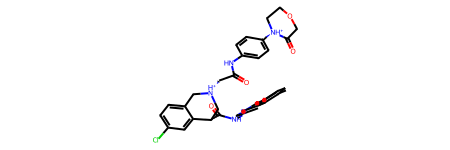

In [79]:
not_same[1][1]

In [80]:
not_same[1][0]

In [82]:
import base64
from rdkit import Chem


def serialize_rdkit_mol(mol: Chem.Mol): 
    props = Chem.PropertyPickleOptions.AllProps
    mol_bytes = mol.ToBinary(props)
    return base64.b64encode(mol_bytes).decode('ascii')  


In [83]:
y_pred_serialized = [serialize_rdkit_mol(mol) for mol in unique["pred_mol"]]


In [85]:
deserialized = Chem.Mol(base64.b64decode(y_pred_serialized[0].encode("ascii")))
deserialized

In [86]:
dm.same_mol(unique["pred_mol"][0], deserialized)


True

In [87]:
competition.submit_predictions(
    predictions=y_pred_serialized,
    prediction_name="asap-oe-docking-baseline",
    prediction_owner="hmacdope",
    report_url="https://www.example.com", 
    # The below metadata is optional, but recommended.
    github_url="https://github.com/polaris-hub/polaris",
    description="Baseline docking for model comparison",
    tags=["baseline"],
    user_attributes={"Framework": "OpenEye", "Method": "POSIT"}
)

[16:49:06]  Success: Submitting competition predictions                                               ]8;id=202489;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=601391;file:///home/hmacdope/mambaforge/envs/asap_v13/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\